In [1]:
#importing stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
from scipy import fft 
from scipy import linalg as la
%matplotlib notebook

In [2]:
# what are we doing? we are trying to get the heart rate (HR) and resipiratory rate (RR)
# how are we going to do this?
# using two techniques, SCG and BCG, that need
# info about the mechanical properties of the human body such as acceleration, angular velocity

# first things first, we load the center_sternum dataset and add a time column as index
df=pd.read_csv("center_sternum.txt",sep=None,engine='python')
df['time_s'] = np.arange(0,df.shape[0])/200 # let's construct the time axis, with each sampling separated by a 200th of a second (because sampling rate is 200 Hz)
df=df.set_index('time_s')
df

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
time_s,,,,,,,,,,,,,,,,
0.000,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
0.005,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
0.010,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
0.015,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
0.020,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82.505,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
82.510,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
82.515,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502


In [3]:
#drop some columns 
new_df=df.drop(columns=['Log Mode','Log Freq','Timestamp','MagnX','MagnY','MagnZ','qw','qi','qj','qk'])
new_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
time_s,,,,,,
0.000,947.086,435.662,70.638,-6.824428,-14.244280,1.404580
0.005,969.168,387.777,88.877,6.183206,-12.290080,-7.969466
0.010,989.603,380.335,78.751,11.709920,-4.961832,-7.450382
0.015,954.894,418.033,88.328,17.877860,2.519084,-5.984733
0.020,972.096,427.732,99.857,25.221370,5.404580,4.015267
...,...,...,...,...,...,...
82.505,958.493,291.092,-54.290,1.664122,2.305344,-0.671756
82.510,954.650,288.042,-49.654,1.480916,2.488550,-0.702290
82.515,967.338,290.482,-63.867,1.114504,3.374046,-0.900763


<IPython.core.display.Javascript object>


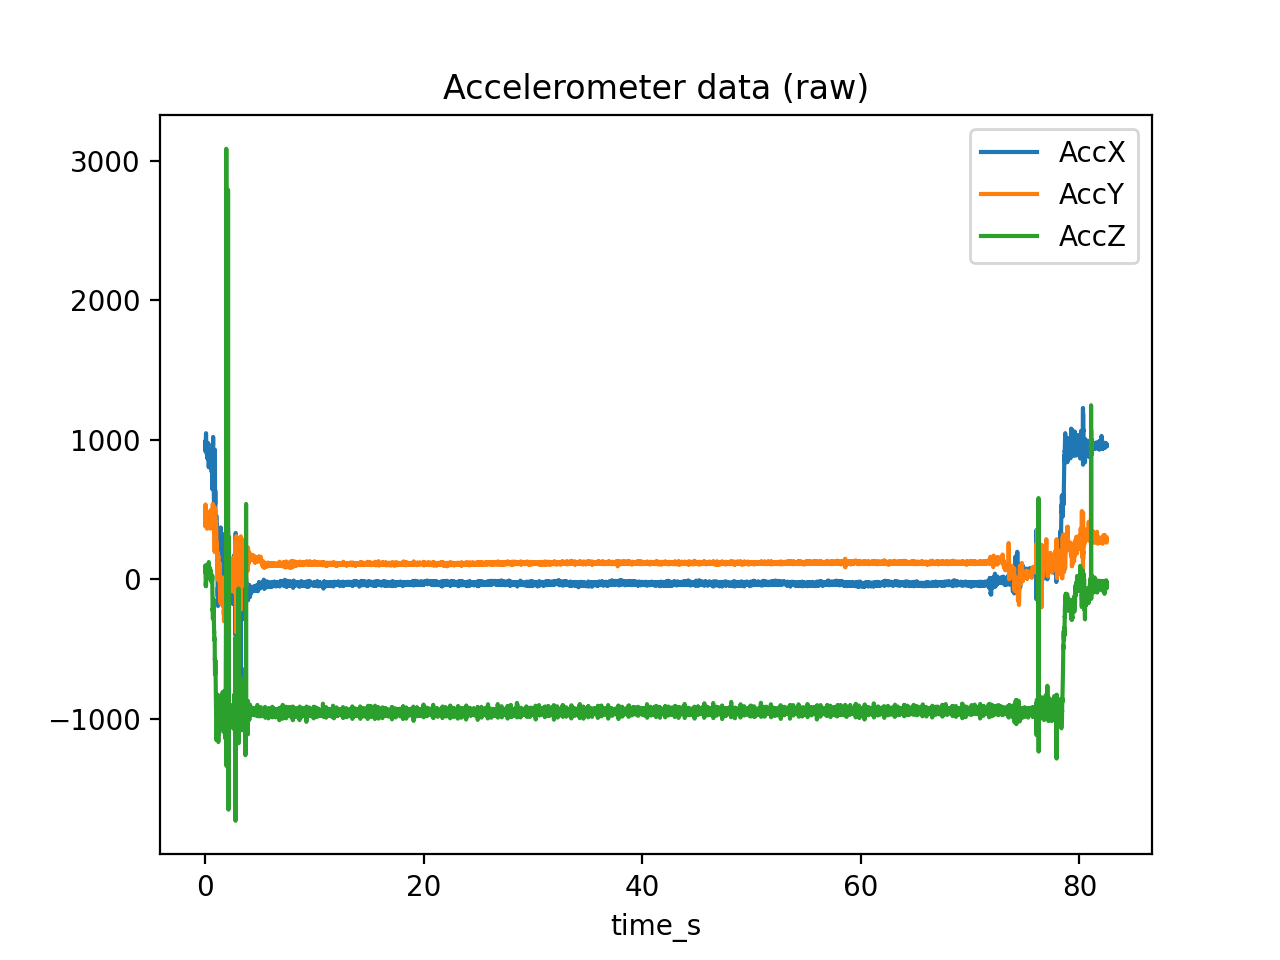

<IPython.core.display.Javascript object>


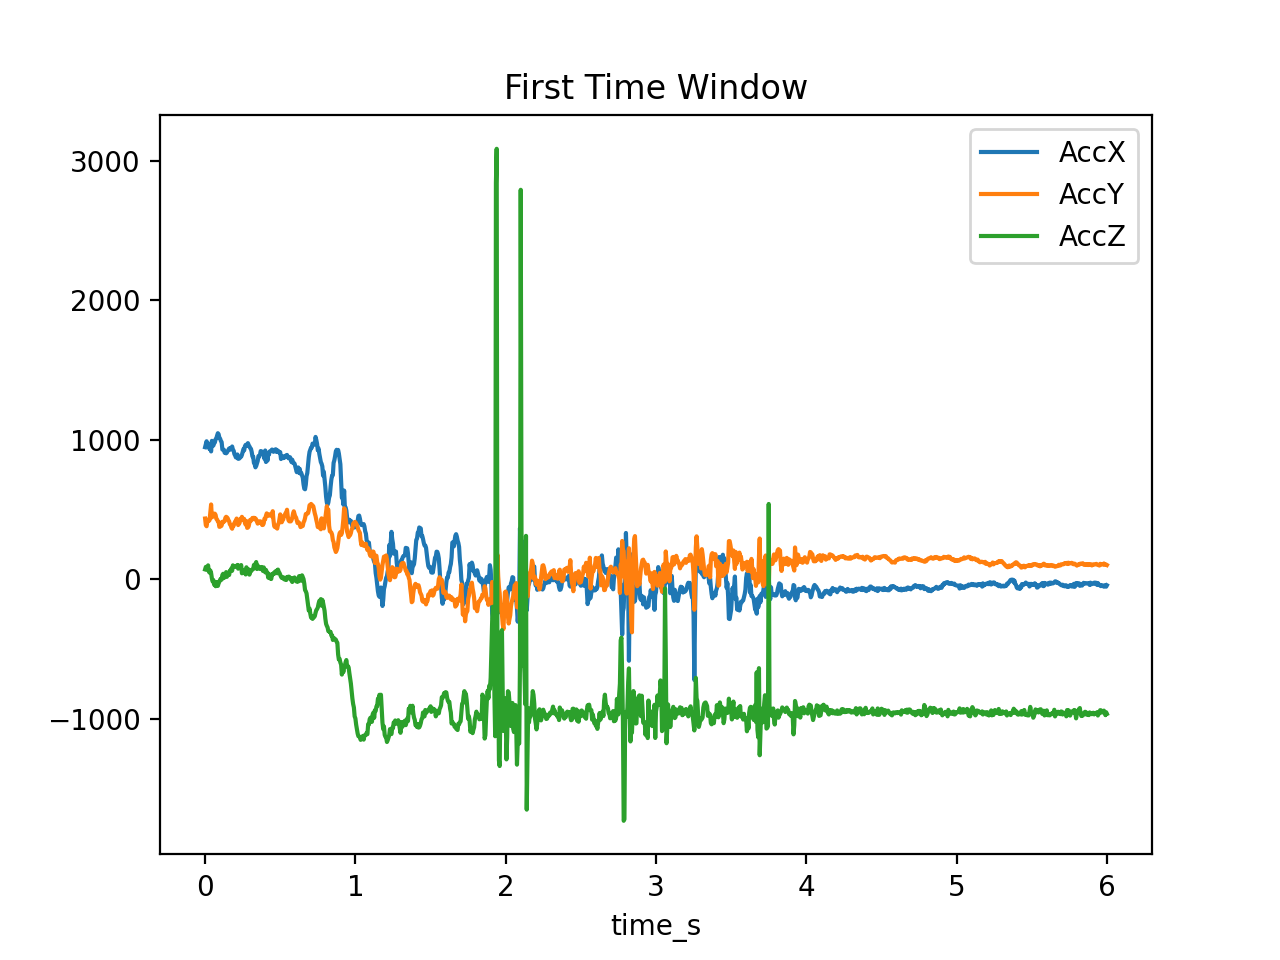

<IPython.core.display.Javascript object>


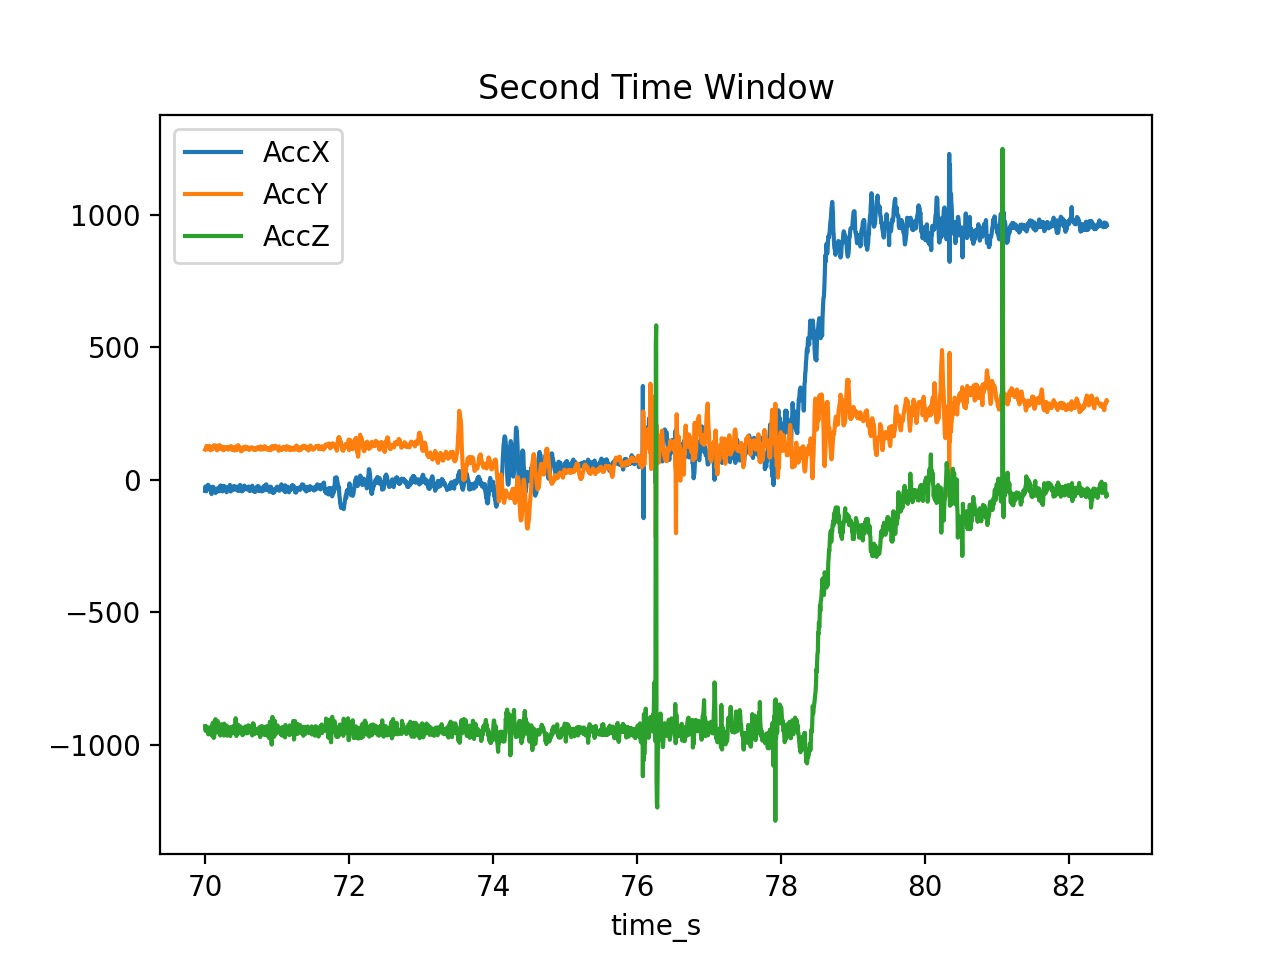

<AxesSubplot:title={'center':'Second Time Window'}, xlabel='time_s'>

In [4]:
# now let's look at the acceleration vector by plotting its three components
new_df.plot(y=['AccX','AccY','AccZ'], title= 'Accelerometer data (raw)')
new_df.loc[0:6].plot(y=['AccX','AccY','AccZ'],title='First Time Window')
new_df.loc[70:].plot(y=['AccX','AccY','AccZ'],title='Second Time Window')

In [5]:
#clean up the data (we select a time intervall from 10s to 70s)
data=new_df.loc[10:70].copy()

data

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
time_s,,,,,,
10.000,-32.635,112.911,-953.796,1.755725,5.022901,-0.809160
10.005,-19.154,112.362,-971.608,1.557252,4.198473,-1.083969
10.010,-27.450,110.593,-944.280,0.931298,4.320611,-1.099237
10.015,-21.777,113.948,-940.803,0.946565,4.137404,-1.267176
10.020,-32.391,118.218,-924.394,1.022901,4.702290,-0.992366
...,...,...,...,...,...,...
69.980,-30.866,118.767,-941.108,-3.175573,3.358779,-0.778626
69.985,-32.818,118.279,-942.145,-2.992366,3.679389,-0.549618
69.990,-22.692,113.704,-948.184,-3.022901,3.786260,-0.564886


<IPython.core.display.Javascript object>


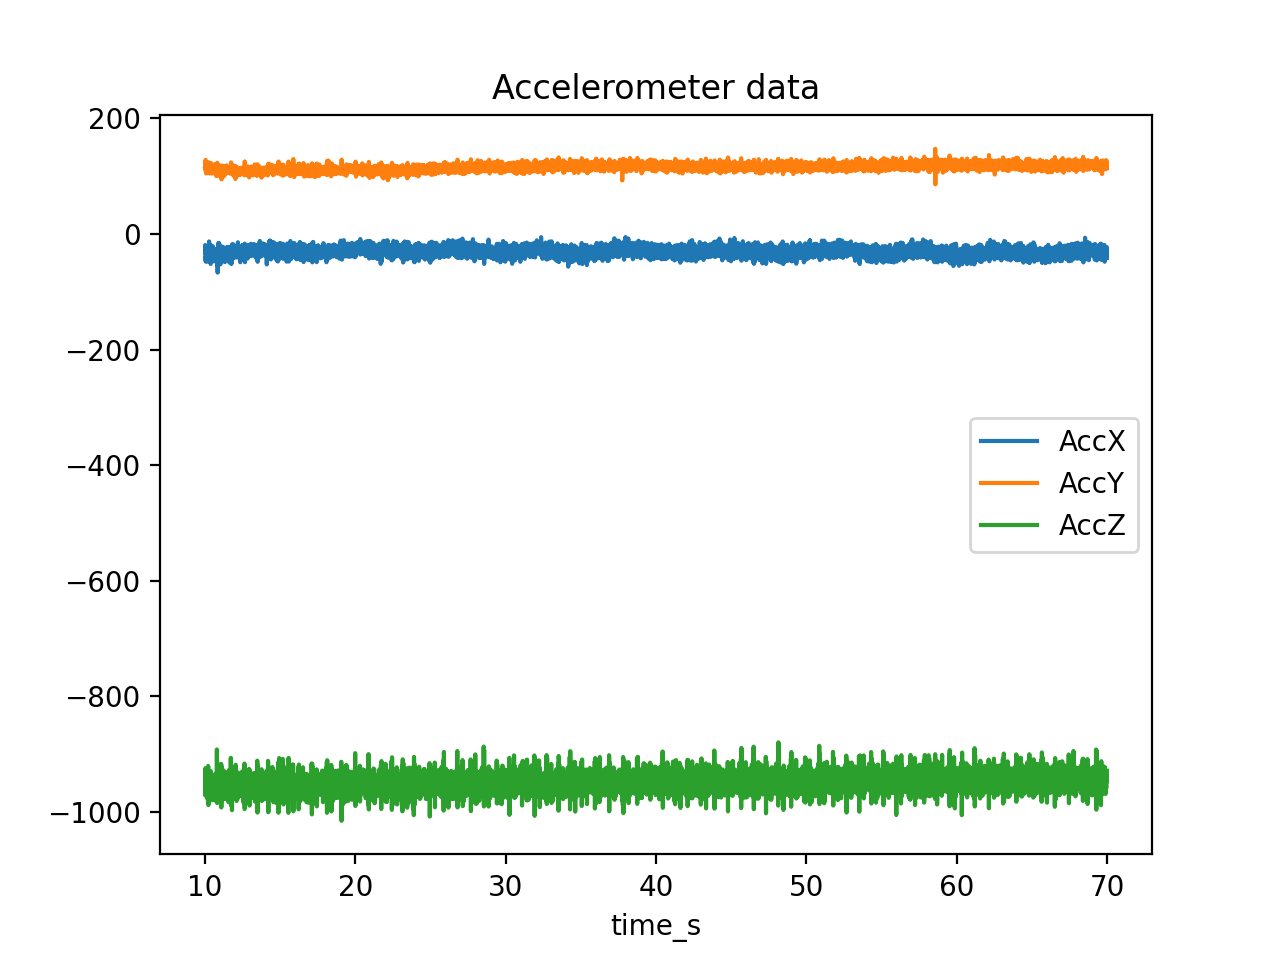

<AxesSubplot:title={'center':'Accelerometer data'}, xlabel='time_s'>

In [6]:
data.plot(y=['AccX','AccY','AccZ'],title= 'Accelerometer data')

In [14]:
#set the offset to 0 and normalize data in order to perform PCA
data['AccX']=(data['AccX']-data['AccX'].mean())/la.norm(data['AccX'])
data['AccY']=(data['AccY']-data['AccY'].mean())/la.norm(data['AccY'])
data['AccZ']=(data['AccZ']-data['AccZ'].mean())/la.norm(data['AccZ'])
data['GyroX']=(data['GyroX']-data['GyroX'].mean())/la.norm(data['GyroX'])
data['GyroY']=(data['GyroY']-data['GyroY'].mean())/la.norm(data['GyroY'])
data['GyroZ']=(data['GyroZ']-data['GyroZ'].mean())/la.norm(data['GyroZ'])

data

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
time_s,,,,,,
10.000,-0.002560,-0.004563,-0.002982,0.024811,0.017165,0.001497
10.005,0.015006,-0.005503,-0.014275,0.023529,0.006605,-0.005414
10.010,0.004197,-0.008534,0.003052,0.019485,0.008170,-0.005798
10.015,0.011589,-0.002786,0.005256,0.019583,0.005823,-0.010022
10.020,-0.002242,0.004529,0.015660,0.020076,0.013059,-0.003111
...,...,...,...,...,...,...
69.980,-0.000254,0.005470,0.005063,-0.007049,-0.004150,0.002265
69.985,-0.002798,0.004634,0.004405,-0.005865,-0.000043,0.008025
69.990,0.010396,-0.003204,0.000577,-0.006062,0.001326,0.007641


In [15]:
data.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
count,1.200100e+04,1.200100e+04,1.200100e+04,1.200100e+04,1.200100e+04,1.200100e+04
mean,-3.627727e-18,1.561891e-17,7.060170e-18,2.655351e-19,1.171780e-17,2.762272e-18
std,9.128709e-03,9.128709e-03,9.128709e-03,9.128709e-03,9.128709e-03,9.128709e-03
min,-4.722947e-02,-5.096145e-02,-4.212072e-02,-5.113900e-02,-4.071802e-02,-4.112473e-02
25%,-5.977338e-03,-6.025642e-03,-5.418098e-03,-3.892240e-03,-5.127689e-03,-5.798500e-03
50%,6.343609e-05,2.444705e-04,-2.743154e-04,-4.399729e-04,-6.300113e-04,3.452031e-04
75%,6.104211e-03,5.992074e-03,4.946817e-03,3.900023e-03,4.063216e-03,6.104914e-03
max,3.289028e-02,5.448095e-02,4.396995e-02,4.236815e-02,4.962666e-02,3.797532e-02


<IPython.core.display.Javascript object>


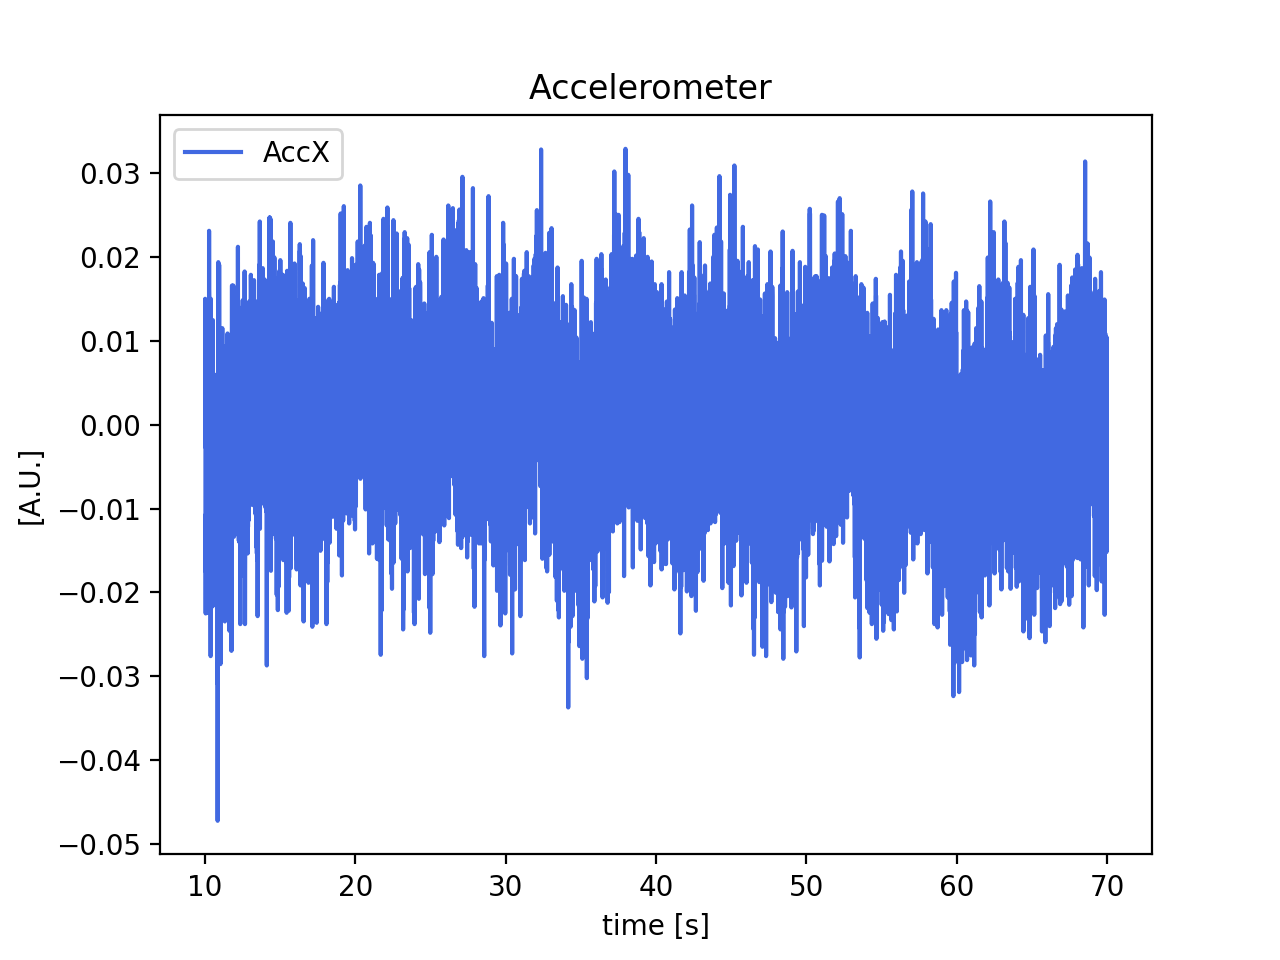

<IPython.core.display.Javascript object>


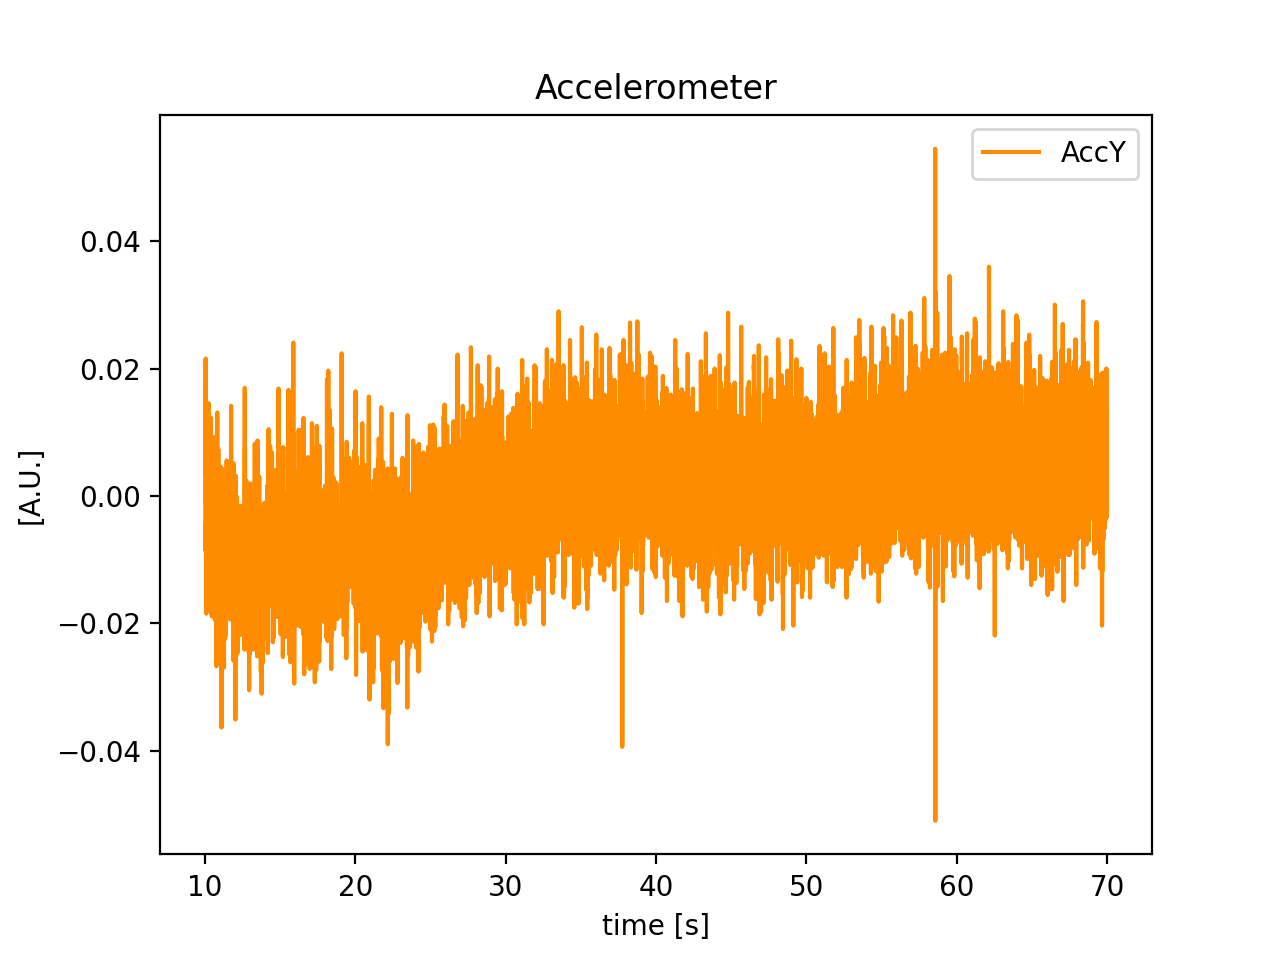

<IPython.core.display.Javascript object>


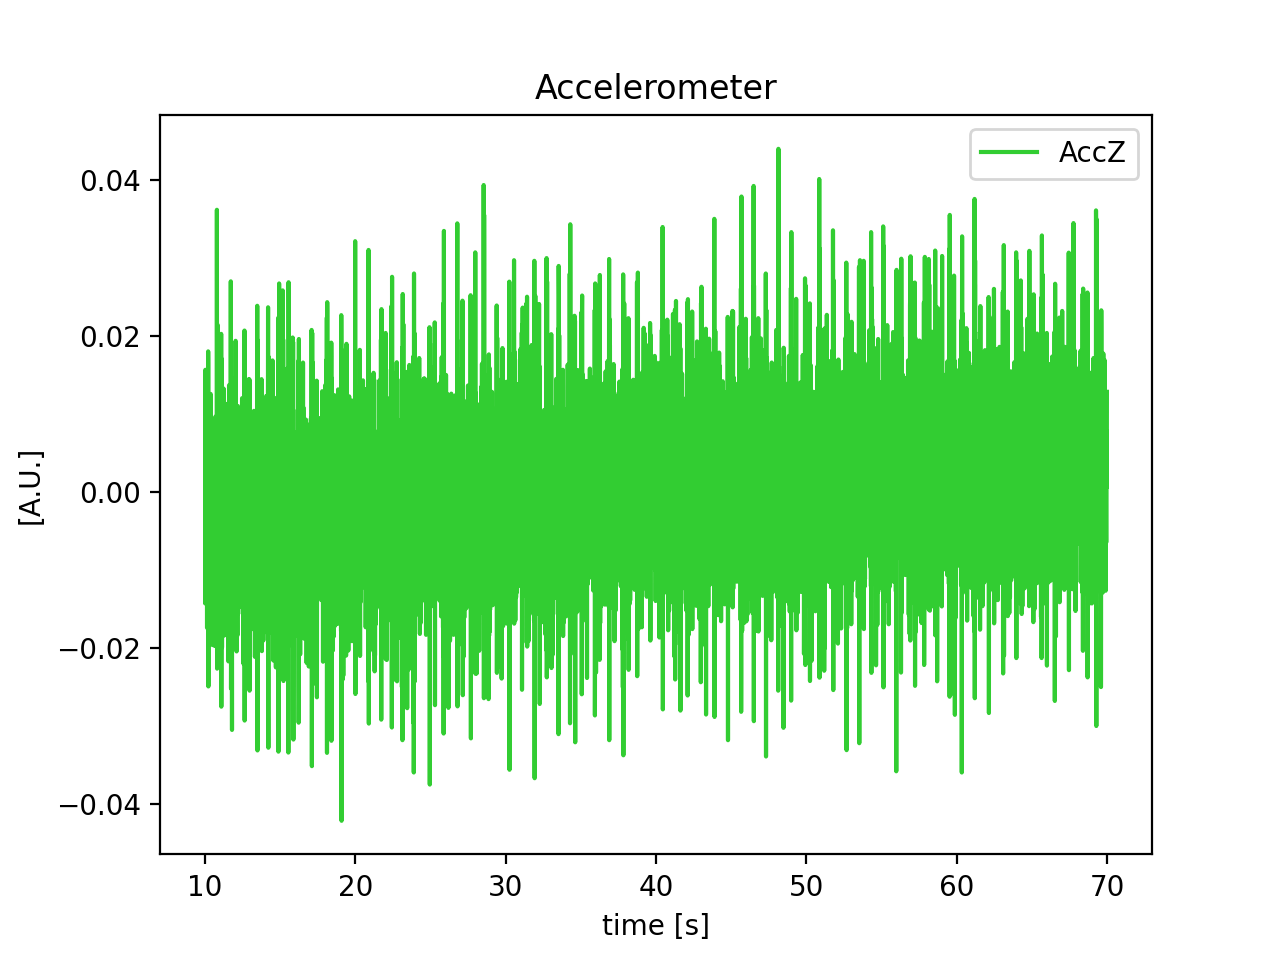

<AxesSubplot:title={'center':'Accelerometer'}, xlabel='time [s]', ylabel='[A.U.]'>

In [23]:
data.plot(y=['AccX'],color='royalblue', title='Accelerometer ',ylabel='[A.U.]', xlabel='time [s]')
data.plot(y=['AccY'],color='darkorange', title='Accelerometer',ylabel='[A.U.]', xlabel='time [s]')
data.plot(y=['AccZ'],color='limegreen', title='Accelerometer',ylabel='[A.U.]', xlabel='time [s]')


<IPython.core.display.Javascript object>


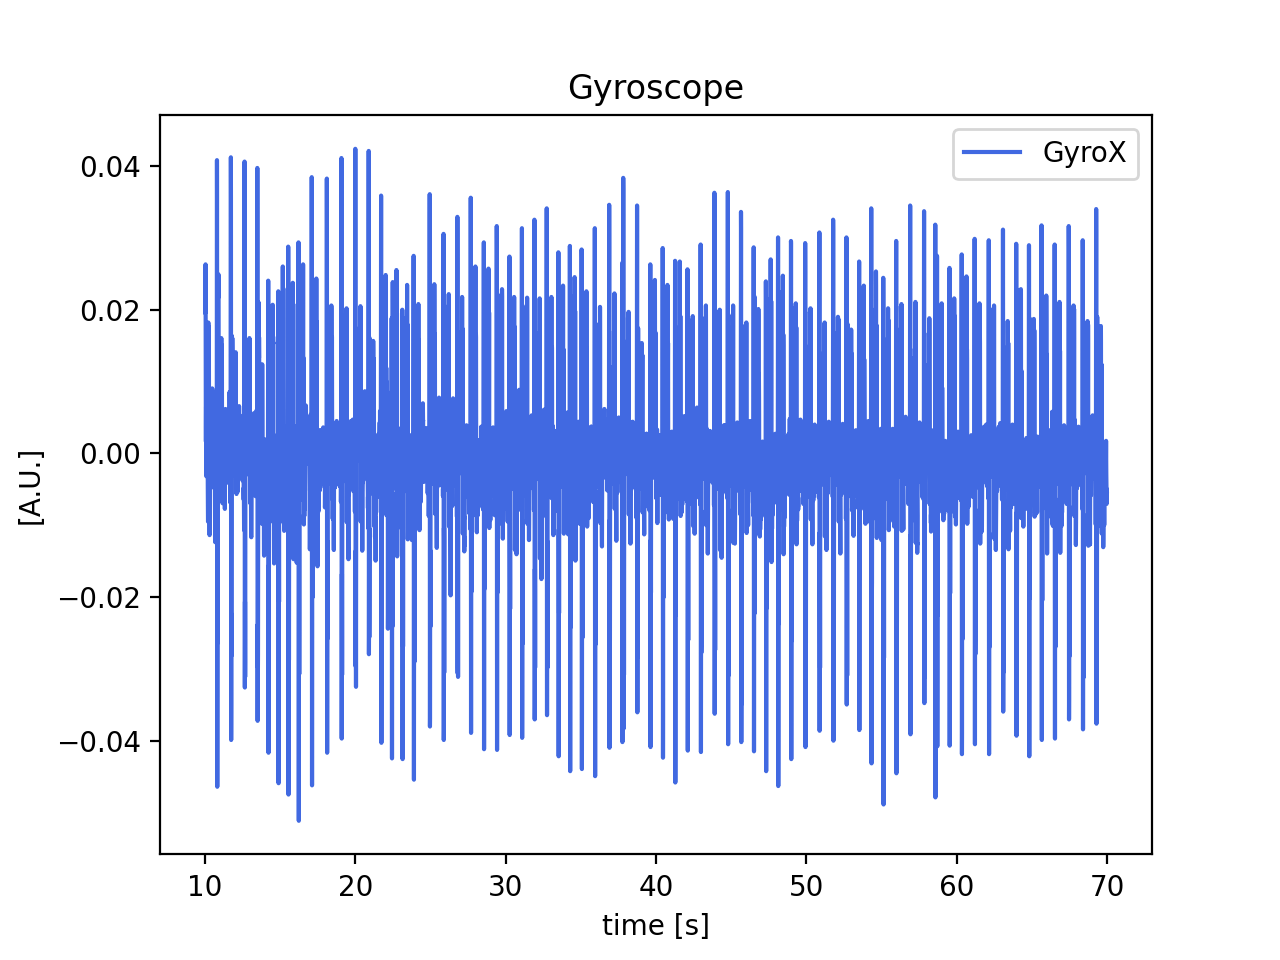

<IPython.core.display.Javascript object>


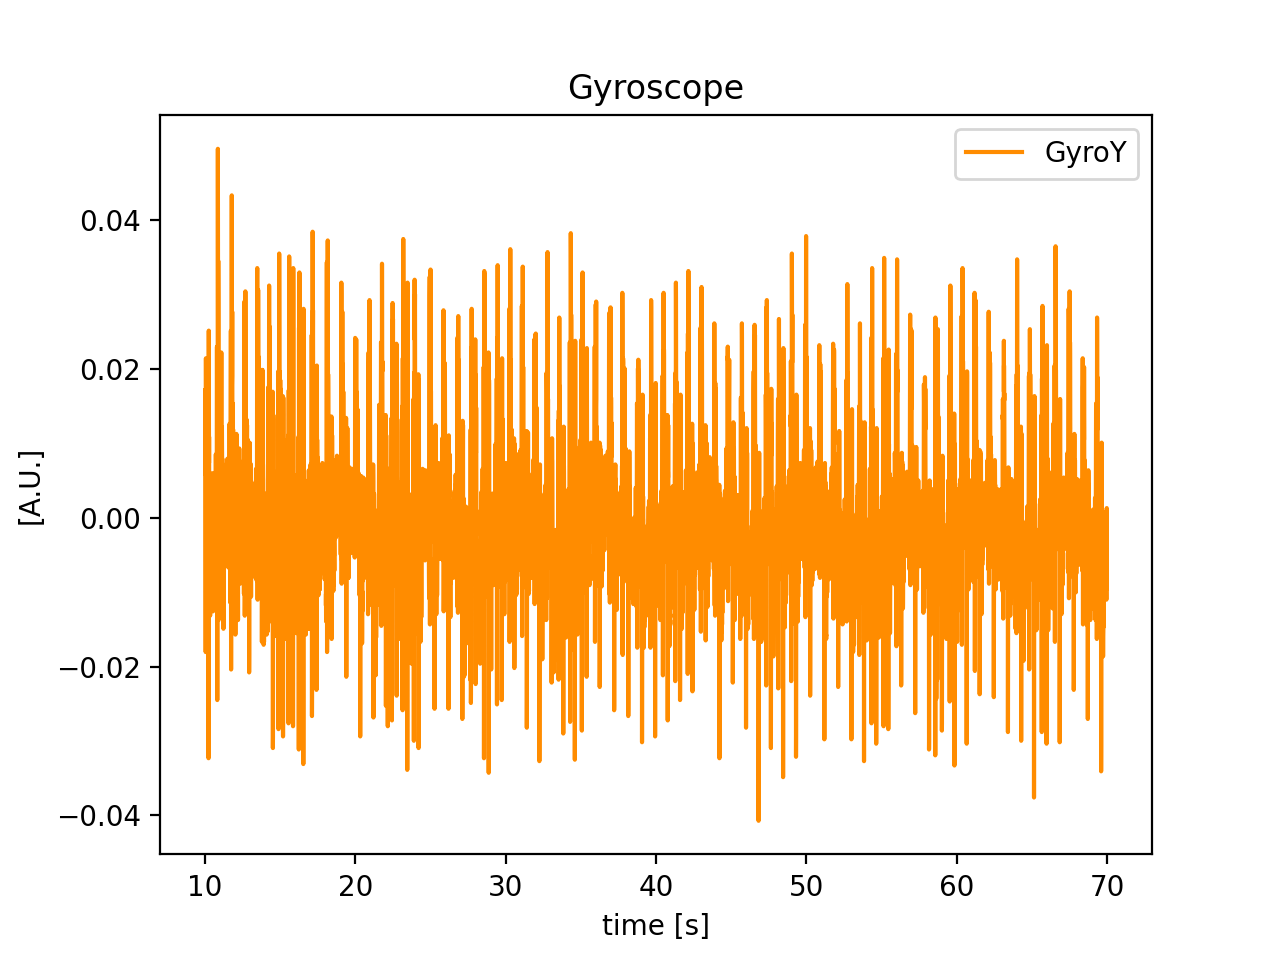

<IPython.core.display.Javascript object>


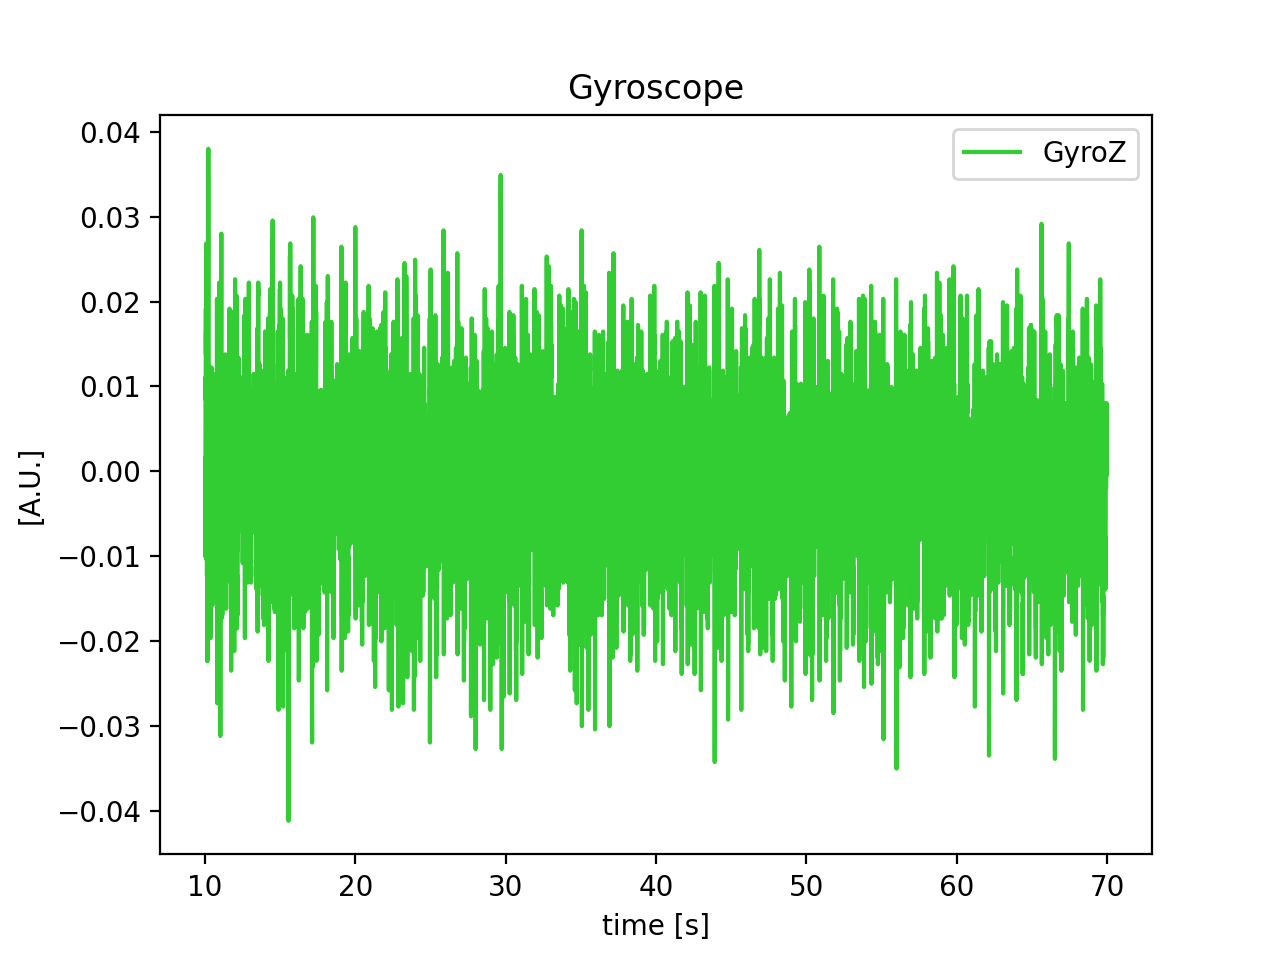

<AxesSubplot:title={'center':'Gyroscope'}, xlabel='time [s]', ylabel='[A.U.]'>

In [24]:
data.plot(y=['GyroX'],color='royalblue', title='Gyroscope',ylabel='[A.U.]', xlabel='time [s]')
data.plot(y=['GyroY'],color='darkorange', title='Gyroscope',ylabel='[A.U.]', xlabel='time [s]')
data.plot(y=['GyroZ'],color='limegreen', title='Gyroscope',ylabel='[A.U.]', xlabel='time [s]')

Contributions to variance along the three eigenvectors' direction:
[0.311 0.254 0.153 0.102 0.087 0.093]


<IPython.core.display.Javascript object>


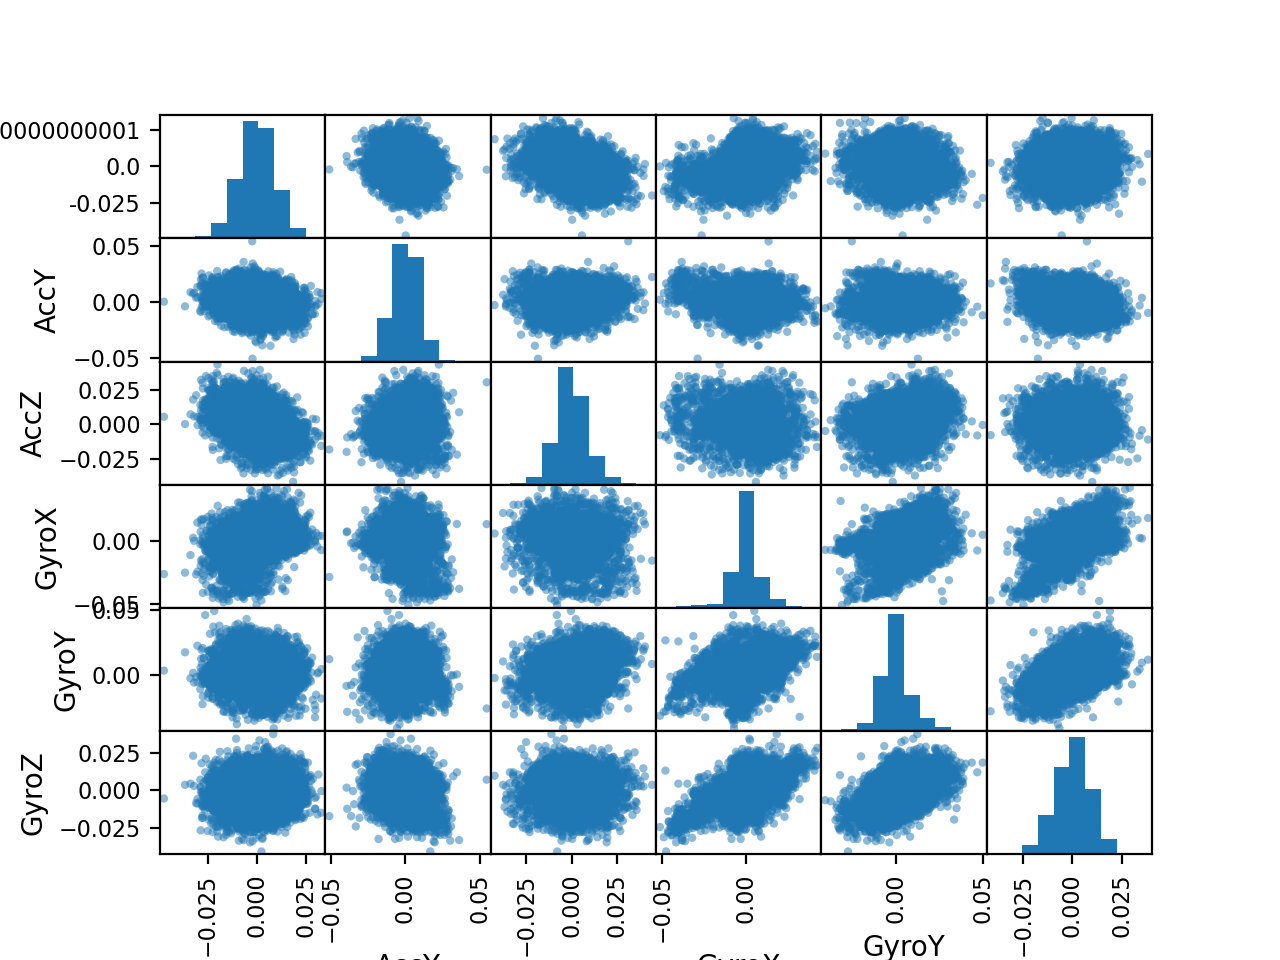

<IPython.core.display.Javascript object>


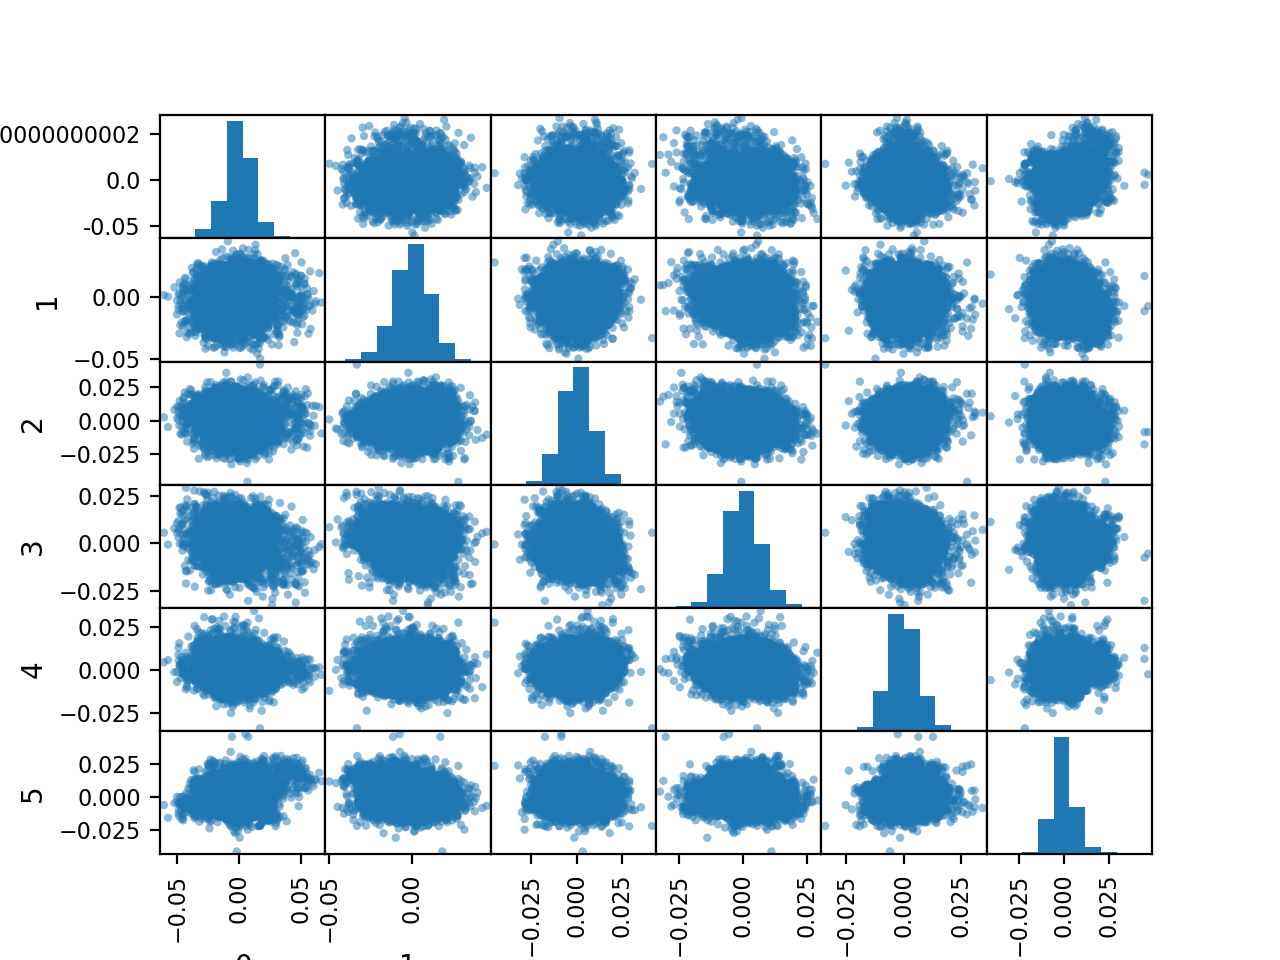

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>,
        <AxesSubplot:xlabel='4', ylabel='0'>,
        <AxesSubplot:xlabel='5', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>,
        <AxesSubplot:xlabel='4', ylabel='1'>,
        <AxesSubplot:xlabel='5', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>,
        <AxesSubplot:xlabel='3', ylabel='2'>,
        <AxesSubplot:xlabel='4', ylabel='2'>,
        <AxesSubplot:xlabel='5', ylabel='2'>],
       [<AxesSubplot:xlabel='0', ylabel='3'>,
        <AxesSubplot:xlabel='1', ylabel='3'>,
        <AxesSubplot:xlabel='2', ylabel='3'>,
        <AxesSubplot:xlabel='3'

In [19]:
#PCA

c=data[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].cov()
l,V=la.eig(c) #V[:,i] is the normalized eigenvector corresponding to the l[i] eigenvalue 
l_r=np.real_if_close(l)
print("Contributions to variance along the three eigenvectors' direction:")
with np.printoptions(precision=3, suppress=True):
    print(l_r/c.values.trace()) 
data_acc_transf = (V.T @ data[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].T).T

pd.plotting.scatter_matrix(data[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']])
pd.plotting.scatter_matrix(data_acc_transf)

<IPython.core.display.Javascript object>


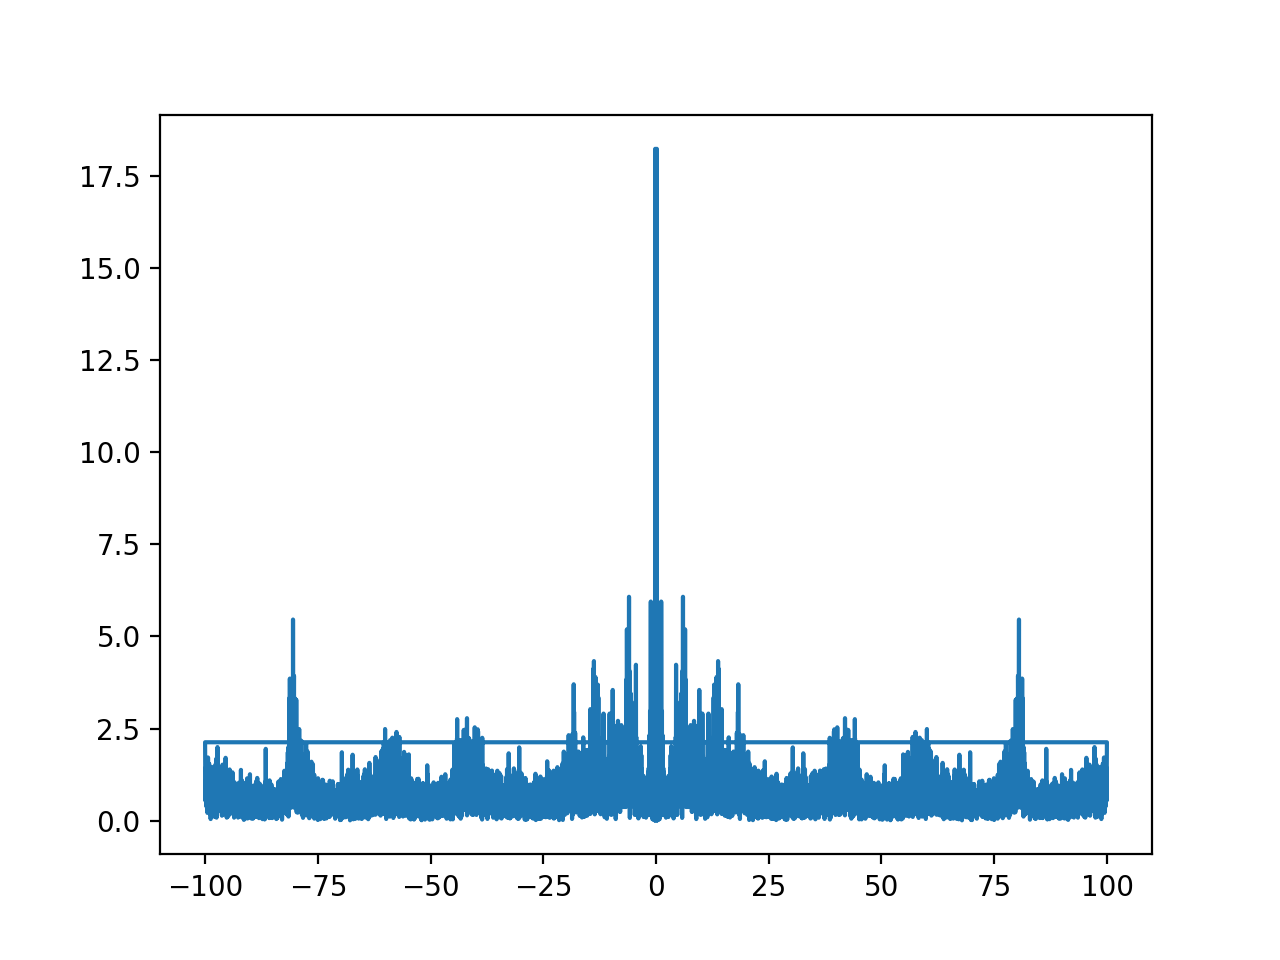

Peak frequency: 0.16665277893508873
Period: 6.000500000000001


In [44]:
time_step=0.005

accX=data['AccX'].values

fft_accX=fft.fft(accX)


accX_freq = fft.fftfreq(accX.size, d=time_step)
power_accX = np.abs(fft_accX)

fig, ax = plt.subplots()
ax.plot(accX_freq, power_accX)


peak_accX = accX_freq[power_accX.argmax()]

print("Peak frequency:", peak_accX)
period_accX=1/peak_accX
print("Period:", period_accX)




<IPython.core.display.Javascript object>


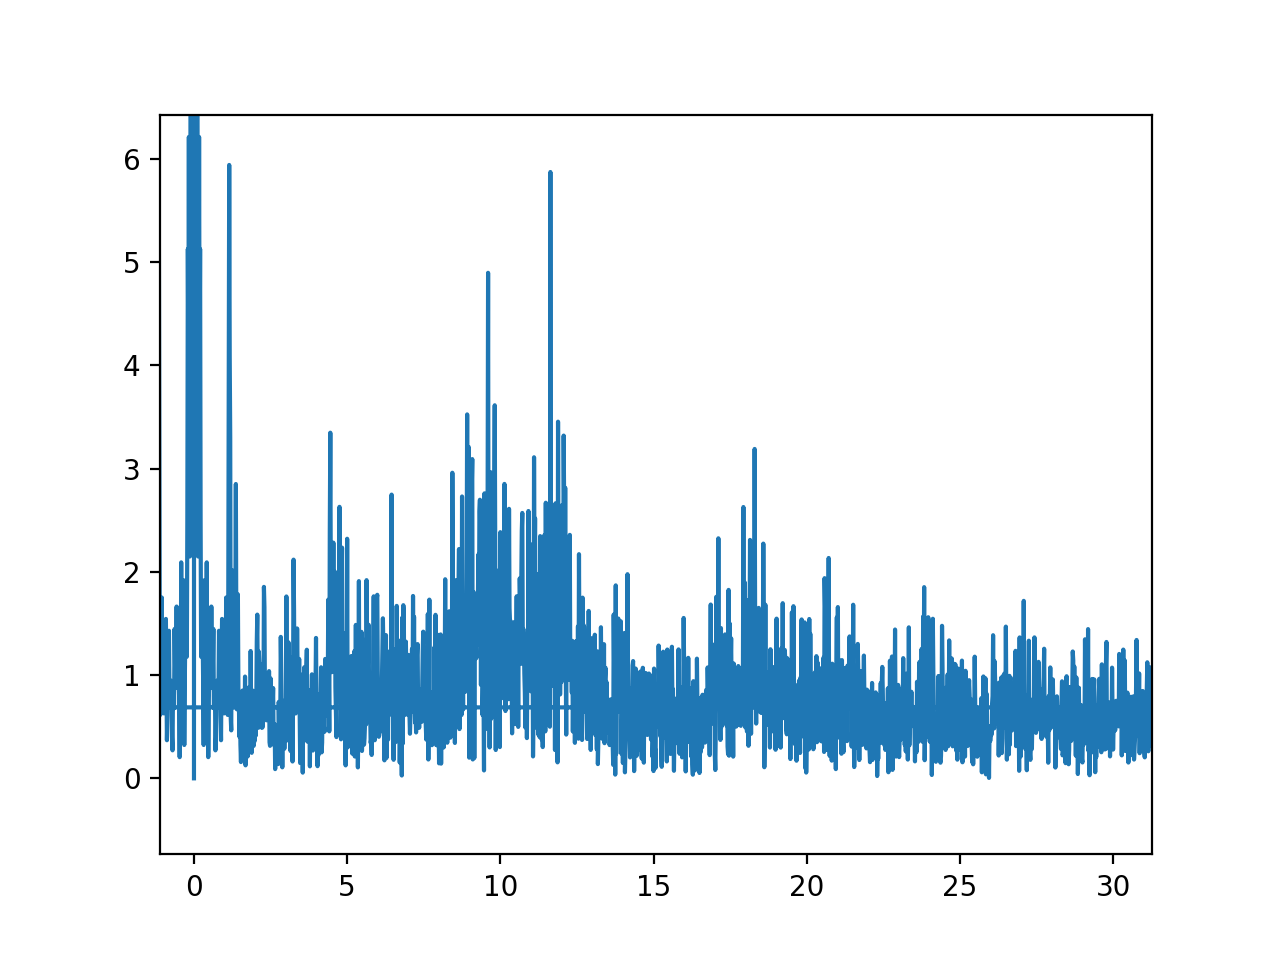

Peak frequency: 0.016665277893508874
Period: 60.005


In [38]:
accY=data['AccY'].values

fft_accY=fft.fft(accY)


accY_freq = fft.fftfreq(accY.size, d=time_step)

power_accY = np.abs(fft_accY)

fig, ax = plt.subplots()
ax.plot(accY_freq, power_accY)


peak_accY = accX_freq[power_accY.argmax()]

print("Peak frequency:", peak_accY)
period_accY=1/peak_accY
print("Period:", period_accY)



<IPython.core.display.Javascript object>


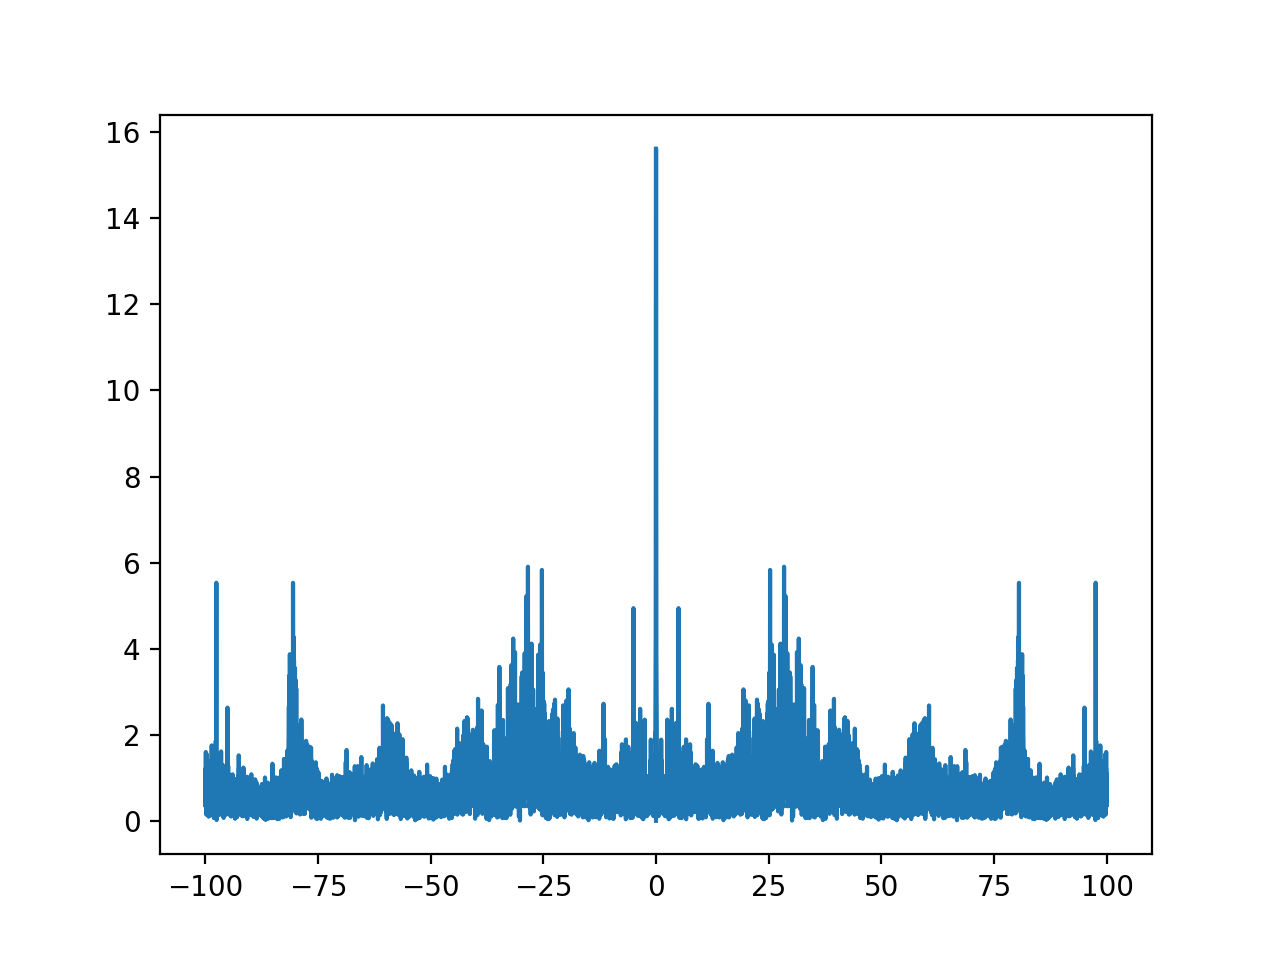

Peak frequency: 0.016665277893508874
Period: 60.005


In [39]:
accZ=data['AccZ'].values

fft_accZ=fft.fft(accZ)



accZ_freq = fft.fftfreq(accZ.size, d=time_step)

power_accZ = np.abs(fft_accZ)

fig, ax = plt.subplots()
ax.plot(accZ_freq, power_accZ)


peak_accZ = accZ_freq[power_accZ.argmax()]

print("Peak frequency:", peak_accZ)
period_accZ=1/peak_accZ
print("Period:", period_accZ)